In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import tqdm
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVC

#pip installed xgboost and lightgbm

In [2]:
def evaluate(pipeline, X_train, X_test, y_train, y_test, average=None):
    '''
    Evaluate a pipeline on training and test datasets
    '''    
    pipeline.fit(X_train, y_train)
    y_train_hat = pipeline.predict(X_train)
    y_test_hat = pipeline.predict(X_test)
    train_f1 = f1_score(y_train_hat, y_train)
    train_acc = accuracy_score(y_train_hat, y_train)
    test_f1 = f1_score(y_test_hat, y_test)
    test_acc = accuracy_score(y_test_hat, y_test)

    print(f"========== Predictor: {type(pipeline).__name__} ==========")
    print(f"Training result: f1: {train_f1:.3f}, acc: {train_acc:.3f}")
    print(f"Test result: f1: {test_f1:.3f}, acc: {test_acc:.3f}")
    print()



In [4]:
# load dataset
df = pd.read_csv("data/capacity.csv")
df.head(5)


,code,entity,solar_capacity_gwh,year
0,DZA,Algeria,0.0,1996
1,DZA,Algeria,0.0,1997
2,DZA,Algeria,0.0,1998
3,DZA,Algeria,0.0,1999
4,DZA,Algeria,0.0,2000


In [5]:
# build X and y matrices
X = df.drop(['code','solar_capacity_gwh'], axis='columns')

y = df[['solar_capacity_gwh']].values.reshape(-1, 1)
print(X.shape, y.shape)

(1353, 2) (1353, 1)


In [6]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
X = pd.get_dummies(X)
X.head()
### END SOLUTION

,year,entity_Algeria,entity_Australia,entity_Austria,entity_Belgium,entity_Brazil,entity_Bulgaria,entity_Canada,entity_Chile,entity_China,...,entity_Total Europe,entity_Total Middle East,entity_Total North America,entity_Total S. & Cent. America,entity_Turkey,entity_Ukraine,entity_United Arab Emirates,entity_United Kingdom,entity_United States,entity_World
0,1996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

array([[  0.    ],
       [  0.    ],
       [  0.    ],
       ...,
       [298.2479],
       [392.2627],
       [487.8287]])

In [8]:
# make sure there is no nan
# if there is nan, you need to deal with it, either by imputing or discarding
df.isnull().sum(axis = 0)


code                  299
entity                  0
solar_capacity_gwh      0
year                    0
dtype: int64

In [9]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
new_y = encoded_y.reshape(-1,1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Split the data into training and testing

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#removed stratify=y

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, new_y,test_size=0.2, random_state=42)
### END SOLUTION






In [11]:
#from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [12]:
#sc = StandardScaler(with_mean=False)

#X_train_sc = sc.fit(X_train)
#X_train = X_train_sc.transform(X_train)
#X_test = X_train_sc.transform(X_test)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
from sklearn.linear_model import LinearRegression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

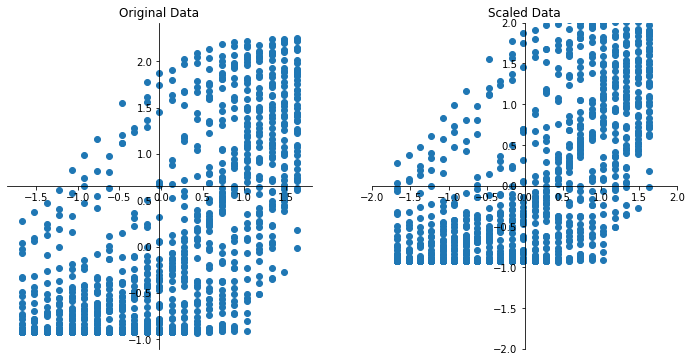

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train.max()
maxy = y_train.max()
axes1.set_xlim#(-maxx + 1, maxx + 1) 
axes1.set_ylim#(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

#axes1.scatter(X_train, y_train)
axes1.scatter(X_train_scaled[:,0], y_train_scaled[:])
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])


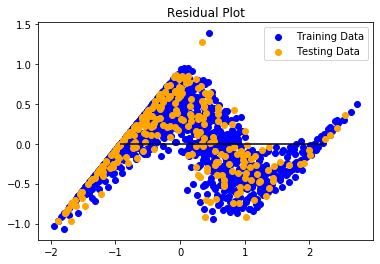

In [19]:
#%matplotlib inline
#import matplotlib.pyplot as plt

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
model = LinearRegression()
#predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)
#X

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

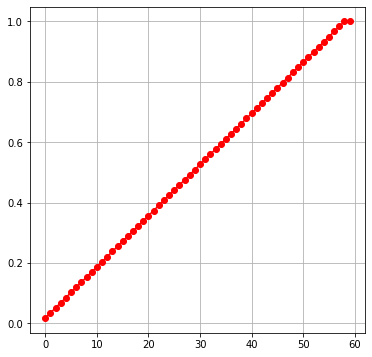

In [24]:
#plot the graph to find the principal components

plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

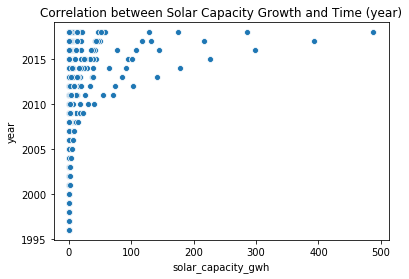

In [29]:
plt.title('Correlation between Solar Capacity Growth and Time (year)')
sns.scatterplot(x=df['solar_capacity_gwh'], y=df['year'])
plt.show()

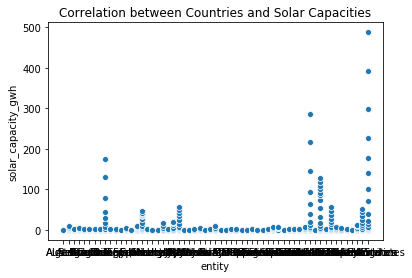

In [27]:
plt.title('Correlation between Countries and Solar Capacities')
sns.scatterplot(x=df['entity'], y=df['solar_capacity_gwh'])
plt.show()

In [30]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19887715021815058, R2: 0.7865052475953421


In [31]:
pca_new = PCA(n_components=8)
X = pca_new.fit_transform(X)

In [33]:
# split to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y)


In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1082, 8)
(1082, 1)
(271, 8)
(271, 1)


In [306]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_test)
print(y_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(y_encoded))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 20  66   1  80   1   1  50 126  33  18 127   1  42   1   1   1 115  69
   1 150 106  23   1  70 141   1  45 138   9  91   1  55   8  59 125   1
  38 159  45   1  30 105 129  40 130   1  71  10 145   1  99   1   1  25
  65  49 121 134  61  85  46  87 139   1 133  14   1 152  13  92 104  14
  74 100   1 151   6   1 128   9   1 112 161  32 165  27   9   1  53  96
 146   6  52 137  93  16  39  82  48  88   1   9  42  22  83 111  64   1
 160  35 156   1 136 113  40  43  29  31  30  34  18  14   6   9  56   1
   1  47  22  45   9 163   9  97   1  30  37  21  25   1  84  75 162  72
   1  77 147  69  12  57  14  18  14   1 149  22 166  25  76   1 109 101
   1   1 118   1  14   2  81   7  24   1 153  51  22   1  26   1  68  89
  25 143   1   3   1   1   4 148 144  86  30   1  14  79   5  22 100 140
  90  63   1  15  94 131  73   1   1  14  62 103  14   6 114  67   1   1
   9 142   0  52 119  18   1   1   1  18  95   4  11  14   1   1 107  98
  27   1  17   9 117 120  60   1  20  19 124   1  2

In [307]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4067229803911523
0.3940791968047613


In [308]:
# try LogisticRegression to establish a baseline performance
pipeline = Pipeline([
    ('scale', StandardScaler()), # remember to scale first before feeding data into lgr
    ('lgr', LogisticRegression()),
])
#evaluate(pipeline, X_train, X_test, y_train, y_test)
#evaluate(pipeline, X_train, X_test, y_train, y_test)

In [309]:
evaluate(pipeline, X_train, X_test, y_train, y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].